classificazione sul dataset dove i valori nulli sono stati sostituiti seguendo le regole di associazione.

#IMPORT DATASET

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/PROGETTO DATA MINING 1/ASSOCIATIONS_RULES/with_rules.csv')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


class_name = 'Loan Status'

df

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,262328.0,Short Term,683.0,536382.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
1,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
2,Fully Paid,176220.0,Short Term,683.0,536382.0,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
3,Charged Off,206602.0,Short Term,729.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
4,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79530,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
79531,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
79532,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
79533,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


#GESTIONE DELLE VARIABILI CATEGORIALI

In [5]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
#df['Loan Status'] = lb_make.fit_transform(df['Loan Status'])

df['Term'] = lb_make.fit_transform(df['Term'])

df['Years in current job'] = lb_make.fit_transform(df['Years in current job'])

df['Home Ownership'] = lb_make.fit_transform(df['Home Ownership'])

df['Purpose'] = lb_make.fit_transform(df['Purpose'])


df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,262328.0,1,683.0,536382.0,1,0,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
1,Fully Paid,99999999.0,1,741.0,2231892.0,8,1,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
2,Fully Paid,176220.0,1,683.0,536382.0,5,2,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
3,Charged Off,206602.0,1,729.0,896857.0,1,0,3,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
4,Fully Paid,217646.0,1,730.0,1184194.0,10,0,3,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79535 entries, 0 to 79534
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                79535 non-null  object 
 1   Current Loan Amount        79535 non-null  float64
 2   Term                       79535 non-null  int64  
 3   Credit Score               79535 non-null  float64
 4   Annual Income              79535 non-null  float64
 5   Years in current job       79535 non-null  int64  
 6   Home Ownership             79535 non-null  int64  
 7   Purpose                    79535 non-null  int64  
 8   Monthly Debt               79535 non-null  float64
 9   Years of Credit History    79535 non-null  float64
 10  Number of Open Accounts    79535 non-null  float64
 11  Number of Credit Problems  79535 non-null  float64
 12  Current Credit Balance     79535 non-null  float64
 13  Maximum Open Credit        79535 non-null  flo

In [7]:
df['Loan Status'].value_counts()

Fully Paid     56906
Charged Off    22629
Name: Loan Status, dtype: int64

# Evaluating the Performance of a Classifier



In order to evaluate the quality of classification there exist several measures: all of them built upon the concept of **Confusion Matrix**.

**Confusion Matrix**
In the field of machine learning a confusion matrix is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).

<img align="right" width="300" src="https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png">

Given a Target class:
* ***True Positive (TP)*** represent those instances correctly predicted to be True
* ***False Positive (FP)*** represent those instances incorrectly predicted to be True
* ***True Negative (TN)*** represent those instances correctly predicted to be False
* ***False Negative (FT)*** represent those instances incorrectly predicted to be False 

Upon such classes are built several indicators.
Among the otehrs, two scores characterize the outcome of a predictive model: ***precision*** and ***recall***

* **Precision**: how many of the instances I predict to be True are really True? $\mathit{precision} = \frac{TP}{TP+FP}$
* **Recall**: how many True instances I was able to correctly predict? $\mathit{recall} = \frac{TP}{TP+FN}$

To summarize the overall performance of a model we can also use the ***accuracy*** and the ***f1-score***: 

* The **accuracy** $= \frac{TP+TN}{TP+TN+FP+FN}$ captures the number of instances correctly classified above all
* $1-\mathit{accuracy}$ gives the errore rate, i.e., the error committed by the classifier.
* The **f1-score** $= \frac{2TP}{2TP+FP+FN}$ describes the armonic mean of precision and recall.

All these indicators are provided by [sklearn](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

# Decision Tree in Python  ([sklearn](http://scikit-learn.org/stable/modules/tree.html))

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Split the dataset into train and test

In [0]:
attributes = [col for col in df.columns if col != 'Loan Status']
X = df[attributes].values
y = df['Loan Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=100, 
                                                    stratify=y)

In [14]:
X_train.shape, X_test.shape

((55674, 15), (23861, 15))

Build the decision tree

Parameters:
* **criterion** (default 'gini'): The function to measure the quality of a split. Available: gini, entropy.
* **max_depth** (default None): The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* **min_samples_split** (default 2): The minimum number of samples required to split an internal node.
* **min_samples_leaf** (default 1): The minimum number of samples required to be at a leaf node.

In [24]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=7, 
                             min_samples_split=50, min_samples_leaf=100)
clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Output:
* **feature\_importances_**: The feature importances. The higher, the more important the feature.
* **tree_**: The underlying Tree object.

Features Importance

In [25]:
for col, imp in zip(attributes, clf.feature_importances_):
    print(col, imp)

Current Loan Amount 0.4450411235867419
Term 0.19762279950824466
Credit Score 0.17924565210658716
Annual Income 0.13440336116994683
Years in current job 0.000407950122617593
Home Ownership 0.001485727966135037
Purpose 0.0
Monthly Debt 0.014277855775530512
Years of Credit History 0.004098951323583294
Number of Open Accounts 0.002809847846776977
Number of Credit Problems 0.0
Current Credit Balance 0.006731091923417511
Maximum Open Credit 0.013875638670418636
Bankruptcies 0.0
Tax Liens 0.0


In [0]:
import pydotplus
from sklearn import tree
from IPython.display import Image

In [0]:
#import os
#os.environ['PATH'] += os.pathsep + 'C:/Users/Username/Anaconda3/Library/bin/graphviz'

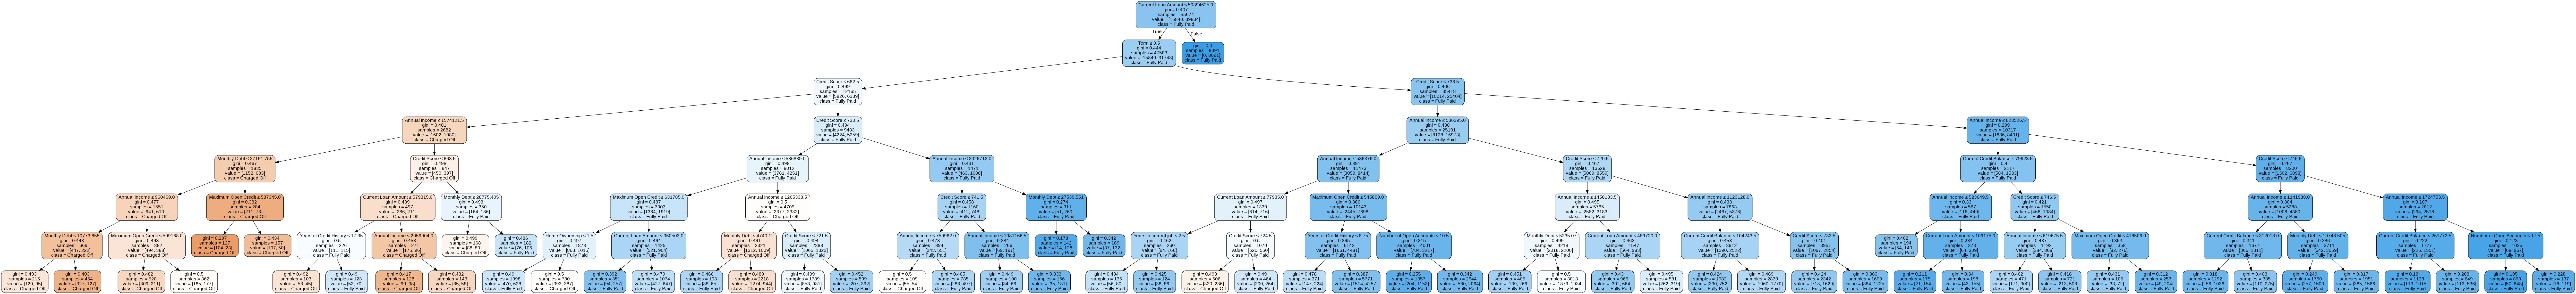

In [27]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=attributes, 
                                class_names=clf.classes_,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

Apply the decision tree on the training set

In [0]:
y_pred = clf.predict(X_train)

Evaluate the performance

In [29]:
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))

Accuracy 0.7323705859108381
F1-score [0.32056544 0.83336688]


In [30]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

 Charged Off       0.58      0.22      0.32     15840
  Fully Paid       0.75      0.94      0.83     39834

    accuracy                           0.73     55674
   macro avg       0.66      0.58      0.58     55674
weighted avg       0.70      0.73      0.69     55674



In [31]:
confusion_matrix(y_train, y_pred)

array([[ 3515, 12325],
       [ 2575, 37259]])

Apply the decision tree on the test set and evaluate the performance

In [0]:
y_pred = clf.predict(X_test)

In [33]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy 0.7343782741712418
F1-score [0.32083155 0.83490492]
              precision    recall  f1-score   support

 Charged Off       0.59      0.22      0.32      6789
  Fully Paid       0.75      0.94      0.83     17072

    accuracy                           0.73     23861
   macro avg       0.67      0.58      0.58     23861
weighted avg       0.71      0.73      0.69     23861



array([[ 1497,  5292],
       [ 1046, 16026]])

In [0]:
from sklearn.preprocessing import LabelBinarizer

In [35]:
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()

['Charged Off', 'Fully Paid']

In [36]:
fpr = dict()
tpr = dict()
roc_auc = dict()
by_test = lb.transform(y_test)
by_pred = lb.transform(y_pred)
for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(by_test[:, i], by_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc

0.5796169202123231

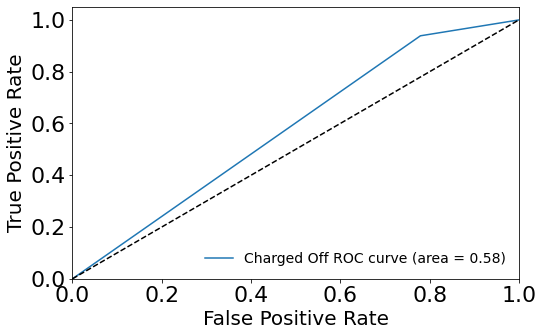

In [37]:
plt.figure(figsize=(8, 5))
for i in range(1):
    plt.plot(fpr[i], tpr[i], 
             label='%s ROC curve (area = %0.2f)' % (lb.classes_.tolist()[i], roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

### Cross Validation  
More options at [link](http://scikit-learn.org/stable/modules/cross_validation.html#)

In [0]:
from sklearn.model_selection import cross_val_score

In [39]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7300 (+/- 0.01)
F1-score: 0.5792 (+/- 0.02)


In [40]:
scores

array([0.58729881, 0.57636996, 0.59073965, 0.60205678, 0.57559059,
       0.55956442, 0.57212034, 0.58423779, 0.57046321, 0.57345116])

### Tuning the hyper-parameters

More options at [link](http://scikit-learn.org/stable/modules/grid_search.html#grid-search)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [0]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [0]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, 
                                   n_iter=100)
random_search.fit(X, y)
clf = random_search.best_estimator_

In [23]:
report(random_search.cv_results_, n_top=10)

Model with rank: 1
Mean validation score: 0.730 (std: 0.002)
Parameters: {'min_samples_split': 50, 'min_samples_leaf': 100, 'max_depth': 7}

Model with rank: 2
Mean validation score: 0.730 (std: 0.003)
Parameters: {'min_samples_split': 30, 'min_samples_leaf': 20, 'max_depth': 8}

Model with rank: 3
Mean validation score: 0.729 (std: 0.002)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 30, 'max_depth': 7}

Model with rank: 3
Mean validation score: 0.729 (std: 0.002)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 30, 'max_depth': 7}

Model with rank: 5
Mean validation score: 0.729 (std: 0.002)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 7}

Model with rank: 6
Mean validation score: 0.729 (std: 0.002)
Parameters: {'min_samples_split': 30, 'min_samples_leaf': 1, 'max_depth': 7}

Model with rank: 7
Mean validation score: 0.729 (std: 0.002)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 8}

Model with rank: 8
Mean 

#ALTRI CLASSIFICATORI DI PROVA

# Random Forest

Sklearn [link](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for more details.

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
clf = RandomForestClassifier(n_estimators=20, 
                             criterion='gini', 
                             max_depth=7, 
                             min_samples_split=50, 
                             min_samples_leaf=100, 
                             class_weight=None)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7265 (+/- 0.01)
F1-score: 0.5082 (+/- 0.02)


In [44]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
clf.predict(X_test)

array(['Fully Paid', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
       'Fully Paid', 'Fully Paid'], dtype=object)

# K-Nearest Neighbors

Sklearn [link](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for more details.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
clf = KNeighborsClassifier(n_neighbors=282)

scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7188 (+/- 0.01)
F1-score: 0.4785 (+/- 0.01)
